# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [82]:
%pip install pandas-datareader
%pip install git+https://github.com/elben10/pydst
%pip install matplotlib-venn

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2

import pandas_datareader 
import pydst 

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# user written modules
import dataproject

Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/elben10/pydst to /private/var/folders/pz/kctcbrz913q45c9l_2mncn_r0000gp/T/pip-req-build-7_4feaxt
  Running command git clone --filter=blob:none --quiet https://github.com/elben10/pydst /private/var/folders/pz/kctcbrz913q45c9l_2mncn_r0000gp/T/pip-req-build-7_4feaxt
  Resolved https://github.com/elben10/pydst to commit bb347560a1b3c17684fda072c829658da38f5a72
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

Import your data, either through an API or manually, and load it. 

In [83]:
start = datetime.datetime(1960,1,1)
end = datetime.datetime(2021,12,31)
timespan = end - start # We can investigate the precise time span by just subtracting to time variables.
print('total number of days:', timespan.days) # The timespan object has a days attribute.

total number of days: 22645


In [84]:
UNEM = pandas_datareader.data.DataReader('UNRATE', 'fred', start, end)
UNEM.head(10)

,UNRATE
DATE,
1960-01-01,5.2
1960-02-01,4.8
1960-03-01,5.4
1960-04-01,5.2
1960-05-01,5.1
1960-06-01,5.4
1960-07-01,5.5
1960-08-01,5.6
1960-09-01,5.5


In [85]:
INF = pandas_datareader.data.DataReader('FPCPITOTLZGUSA', 'fred', start, end)
INF.head(10)

,FPCPITOTLZGUSA
DATE,
1960-01-01,1.457976
1961-01-01,1.070724
1962-01-01,1.198773
1963-01-01,1.239669
1964-01-01,1.278912
1965-01-01,1.585169
1966-01-01,3.015075
1967-01-01,2.772786
1968-01-01,4.271796


In [86]:
# renaming variables 

INF.rename(columns = {'FPCPITOTLZGUSA':'Inflation'}, inplace=True)
UNEM.rename(columns = {'UNRATE':'Unemployment'}, inplace=True)





#Statistikbanken

In [87]:
# Loading the Data from statistikbanken
filename = 'Ejendom.xlsx'
pd.read_excel(filename).head(5)

,"Ejendomssalg efter overdragelsesformer, nøgletal, ejendomskategori, område og tid",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,Enhed: -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
2,Almindelig fri handel,Gennemsnitlig pris pr. ejendom (1000 kr),Enfamiliehuse,Hele landet,551.0,565.0,622.0,656.0,753.0,806.0,...,1883.0,1955.0,2082.0,2122.0,2209.0,2257.0,2335.0,2477.0,2639.0,2464.0
3,NaN,NaN,NaN,Region Hovedstaden,777.0,789.0,876.0,935.0,1088.0,1195.0,...,2965.0,3075.0,3310.0,3465.0,3623.0,3754.0,3873.0,4231.0,4723.0,4471.0
4,NaN,NaN,NaN,Landsdel Byen København,767.0,785.0,856.0,917.0,1063.0,1169.0,...,3535.0,3775.0,4129.0,4441.0,4725.0,4938.0,5128.0,5708.0,6198.0,6146.0


In [88]:
# Now we are dropping rows
prop = pd.read_excel(filename, skiprows=2)
prop.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Almindelig fri handel,Gennemsnitlig pris pr. ejendom (1000 kr),Enfamiliehuse,Hele landet,551,565,622,656,753,806,...,1883,1955,2082,2122,2209,2257,2335,2477,2639,2464
1,NaN,NaN,NaN,Region Hovedstaden,777,789,876,935,1088,1195,...,2965,3075,3310,3465,3623,3754,3873,4231,4723,4471
2,NaN,NaN,NaN,Landsdel Byen København,767,785,856,917,1063,1169,...,3535,3775,4129,4441,4725,4938,5128,5708,6198,6146
3,NaN,NaN,NaN,Landsdel Københavns omegn,836,844,955,1029,1204,1321,...,3255,3384,3674,3950,4131,4312,4450,4797,5404,5046
4,NaN,NaN,NaN,Landsdel Nordsjælland,797,810,901,965,1126,1226,...,2706,2773,2968,3048,3232,3345,3472,3786,4301,4153


In [89]:
# Now we drop the first two columns
del prop['Unnamed: 0'], prop['Unnamed: 1'], prop['Unnamed: 2']
prop.head(5)

,Unnamed: 3,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Hele landet,551,565,622,656,753,806,884,955,1047,...,1883,1955,2082,2122,2209,2257,2335,2477,2639,2464
1,Region Hovedstaden,777,789,876,935,1088,1195,1338,1485,1631,...,2965,3075,3310,3465,3623,3754,3873,4231,4723,4471
2,Landsdel Byen København,767,785,856,917,1063,1169,1376,1539,1731,...,3535,3775,4129,4441,4725,4938,5128,5708,6198,6146
3,Landsdel Københavns omegn,836,844,955,1029,1204,1321,1472,1628,1784,...,3255,3384,3674,3950,4131,4312,4450,4797,5404,5046
4,Landsdel Nordsjælland,797,810,901,965,1126,1226,1373,1536,1674,...,2706,2773,2968,3048,3232,3345,3472,3786,4301,4153


In [90]:
# Now we rename the variable 'Unnamed: 3' 
prop.rename(columns = {'Unnamed: 3':'County'},inplace=True)
col_dict = {}
for i in range(1992, 2022+1): # range goes from 2008 to but not including 2018
    col_dict[str(i)] = f'prop{i}' 
prop.rename(columns = col_dict, inplace=True)
prop.head(10)

,County,prop1992,prop1993,prop1994,prop1995,prop1996,prop1997,prop1998,prop1999,prop2000,...,prop2013,prop2014,prop2015,prop2016,prop2017,prop2018,prop2019,prop2020,prop2021,prop2022
0,Hele landet,551,565,622,656,753,806,884,955,1047,...,1883,1955,2082,2122,2209,2257,2335,2477,2639,2464
1,Region Hovedstaden,777,789,876,935,1088,1195,1338,1485,1631,...,2965,3075,3310,3465,3623,3754,3873,4231,4723,4471
2,Landsdel Byen København,767,785,856,917,1063,1169,1376,1539,1731,...,3535,3775,4129,4441,4725,4938,5128,5708,6198,6146
3,Landsdel Københavns omegn,836,844,955,1029,1204,1321,1472,1628,1784,...,3255,3384,3674,3950,4131,4312,4450,4797,5404,5046
4,Landsdel Nordsjælland,797,810,901,965,1126,1226,1373,1536,1674,...,2706,2773,2968,3048,3232,3345,3472,3786,4301,4153
5,Landsdel Bornholm,335,341,368,388,434,453,475,496,531,...,819,798,811,897,987,1007,1044,1135,1314,1260
6,Region Sjælland,509,529,576,608,686,740,809,874,966,...,1562,1583,1740,1780,1848,1942,1996,2090,2272,2186
7,Landsdel Østsjælland,704,716,813,879,1013,1106,1240,1338,1467,...,2253,2304,2491,2685,2755,2934,3052,3252,3681,3684
8,Landsdel Vest- og Sydsjælland,445,457,490,517,567,616,675,732,795,...,1173,1158,1292,1309,1377,1459,1495,1533,1702,1659
9,Region Syddanmark,484,496,544,571,653,696,767,812,856,...,1362,1407,1487,1495,1566,1617,1688,1722,1858,1812


In [91]:
# We are only interesetd in the Countys so we drop the regions and the whole country
I = prop.County.str.contains('Region')
I |= prop.County.str.contains('Hele landet')
prop.loc[I, :]
prop = prop.loc[I == False]
prop.head(5)

,County,prop1992,prop1993,prop1994,prop1995,prop1996,prop1997,prop1998,prop1999,prop2000,...,prop2013,prop2014,prop2015,prop2016,prop2017,prop2018,prop2019,prop2020,prop2021,prop2022
2,Landsdel Byen København,767,785,856,917,1063,1169,1376,1539,1731,...,3535,3775,4129,4441,4725,4938,5128,5708,6198,6146
3,Landsdel Københavns omegn,836,844,955,1029,1204,1321,1472,1628,1784,...,3255,3384,3674,3950,4131,4312,4450,4797,5404,5046
4,Landsdel Nordsjælland,797,810,901,965,1126,1226,1373,1536,1674,...,2706,2773,2968,3048,3232,3345,3472,3786,4301,4153
5,Landsdel Bornholm,335,341,368,388,434,453,475,496,531,...,819,798,811,897,987,1007,1044,1135,1314,1260
7,Landsdel Østsjælland,704,716,813,879,1013,1106,1240,1338,1467,...,2253,2304,2491,2685,2755,2934,3052,3252,3681,3684


In [92]:
# We reset the index 
prop.reset_index(inplace = True, drop = True) # Drop old index too
prop.iloc[0:5,:]

,County,prop1992,prop1993,prop1994,prop1995,prop1996,prop1997,prop1998,prop1999,prop2000,...,prop2013,prop2014,prop2015,prop2016,prop2017,prop2018,prop2019,prop2020,prop2021,prop2022
0,Landsdel Byen København,767,785,856,917,1063,1169,1376,1539,1731,...,3535,3775,4129,4441,4725,4938,5128,5708,6198,6146
1,Landsdel Københavns omegn,836,844,955,1029,1204,1321,1472,1628,1784,...,3255,3384,3674,3950,4131,4312,4450,4797,5404,5046
2,Landsdel Nordsjælland,797,810,901,965,1126,1226,1373,1536,1674,...,2706,2773,2968,3048,3232,3345,3472,3786,4301,4153
3,Landsdel Bornholm,335,341,368,388,434,453,475,496,531,...,819,798,811,897,987,1007,1044,1135,1314,1260
4,Landsdel Østsjælland,704,716,813,879,1013,1106,1240,1338,1467,...,2253,2304,2491,2685,2755,2934,3052,3252,3681,3684


In [97]:
# We convert to dataset into 
prop_long = prop.melt(id_vars=['County'], var_name = 'Year', value_name='Properties')
prop_long.head(10) 

,County,Year,Properties
0,Landsdel Byen København,prop1992,767
1,Landsdel Københavns omegn,prop1992,836
2,Landsdel Nordsjælland,prop1992,797
3,Landsdel Bornholm,prop1992,335
4,Landsdel Østsjælland,prop1992,704
5,Landsdel Vest- og Sydsjælland,prop1992,445
6,Landsdel Fyn,prop1992,470
7,Landsdel Sydjylland,prop1992,494
8,Landsdel Østjylland,prop1992,557
9,Landsdel Vestjylland,prop1992,471


In [99]:
prop_long['properties_demean'] = prop_long.Properties - prop_long.Properties.mean()
prop_long.head()

,County,Year,Properties,properties_demean
0,Landsdel Byen København,prop1992,767,-640.052786
1,Landsdel Københavns omegn,prop1992,836,-571.052786
2,Landsdel Nordsjælland,prop1992,797,-610.052786
3,Landsdel Bornholm,prop1992,335,-1072.052786
4,Landsdel Østsjælland,prop1992,704,-703.052786


## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [ ]:
def plot_func(df, County):
    # Function that operates on data set
    I = df['County'] == County
    ax=df.loc[I,:].plot(x='year', y='prop', style='-o', legend=False)

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
    df = widgets.fixed(prop),
    County = widgets.Dropdown(description='County', 
                                    options=prop.County.unique(), 
                                    value='Landsdel')
); 


Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

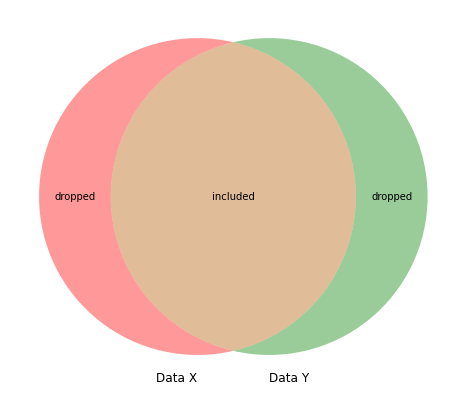

In [ ]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.